In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

combined_df = pd.read_excel('combined_data.xlsx')
combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
combined_df['length_of_transcript'] = combined_df['Transcript'].apply(lambda x: len(x))

# Define a function to map the decision values
def map_decision(decision):
    if decision in ['reject', 'rejected']:
        return 'reject'
    elif decision in ['select', 'selected']:
        return 'select'
    else:
        return decision  # Return other values as they are


# Apply the mapping function to the 'decision' column
combined_df['decision'] = combined_df['decision'].apply(map_decision)

combined_df[['length_of_transcript','decision']].groupby('decision').mean()

<ipython-input-1-234bccec7ac4>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,length_of_transcript
decision,
reject,3989.433554
select,4628.299307


In [2]:
combined_df['num_words_in_transcript'] = combined_df['Transcript'].apply(lambda x: len(str(x).split()))

In [3]:
combined_df[['num_words_in_transcript','decision','Role']].groupby(['Role','decision']).agg({'mean','median','std'})

num_words_in_transcript              \
                                                          std        mean   
Role                         decision                                       
ai engineer                  reject                 18.212633  567.200000   
                             select                204.121419  659.125000   
business analyst             reject                110.323615  616.400000   
                             select                 54.802980  693.833333   
cloud architect              reject                 76.906870  587.000000   
                             select                 19.670197  802.250000   
content writer               reject                 61.554854  529.000000   
                             select                 30.405592  684.500000   
cybersecurity specialist     reject                123.835375  636.000000   
                             select                 77.929455  704.000000   
data analyst                 reject                122.354873  689.741007   
                             select                109.459986  767.414062   
data engineer                reject                129.799075  648.388889   
                             select                130.921223  741.154812   
data scientist               reject                125.954125  660.835526   
                             select                135.307700  733.187500   
database administrator       reject                 73.432509  554.333333   
                             select                 87.793887  726.833333   
devops engineer              reject                 61.727223  601.750000   
                             select                 49.273510  695.666667   
digital marketing specialist reject                 43.657760  639.000000   
                             select                 72.875083  701.444444   
game developer               reject                179.199144  447.333333   
                             select                311.369020  444.000000   
graphic designer             reject                 61.207930  541.125000   
                             select                 63.439510  683.714286   
hr specialist                reject                 66.817413  657.166667   
                             select                 94.219779  745.833333   
machine learning engineer    reject                100.349390  654.000000   
                             select                 72.034053  817.285714   
mobile app developer         reject                 88.803153  621.000000   
                             select                 11.372481  649.333333   
network engineer             reject                 92.458699  553.888889   
                             select                 60.419171  766.857143   
product manager              reject                118.320182  633.996169   
                             select                131.864261  746.272727   
project manager              reject                 92.922439  695.833333   
                             select                 82.964084  739.843750   
software developer           reject                126.307029  674.461538   
                             select                 85.288800  693.555556   
software engineer            reject                168.196672  643.860714   
                             select                154.588161  721.018450   
system administrator         reject                 48.280431  559.000000   
                             select                  7.778175  761.500000   
ui designer                  reject                133.628907  722.552000   
                             select                108.505000  770.715596   
ui engineer                  reject                124.736686  584.229167   
                             select                168.401848  683.734694   
ui/ux designer               reject                 65.199693  494.000000   
                             selec

<ipython-input-4-ffd681a7b297>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df[combined_df['decision']=='reject']['num_words_in_transcript'])


<Axes: xlabel='num_words_in_transcript', ylabel='Density'>

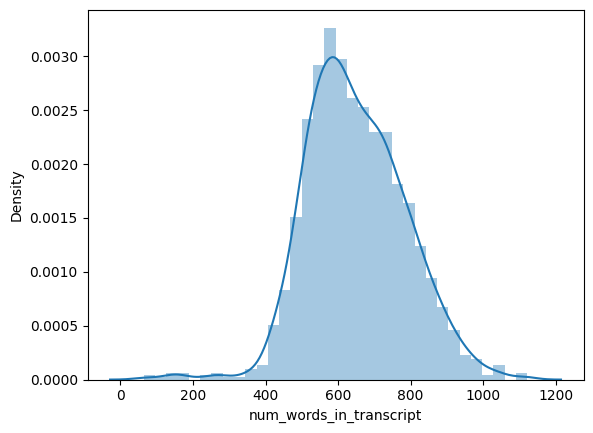

In [4]:
sns.distplot(combined_df[combined_df['decision']=='reject']['num_words_in_transcript'])

In [5]:
combined_df[['num_words_in_transcript','decision']].groupby(['decision']).mean()

,num_words_in_transcript
decision,
reject,649.512327
select,732.646503


<ipython-input-6-75d1046006c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df[combined_df['decision']=='select']['num_words_in_transcript'])


<Axes: xlabel='num_words_in_transcript', ylabel='Density'>

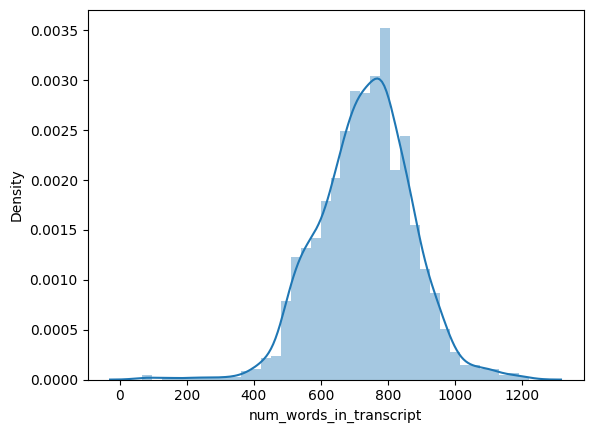

In [6]:
sns.distplot(combined_df[combined_df['decision']=='select']['num_words_in_transcript'])

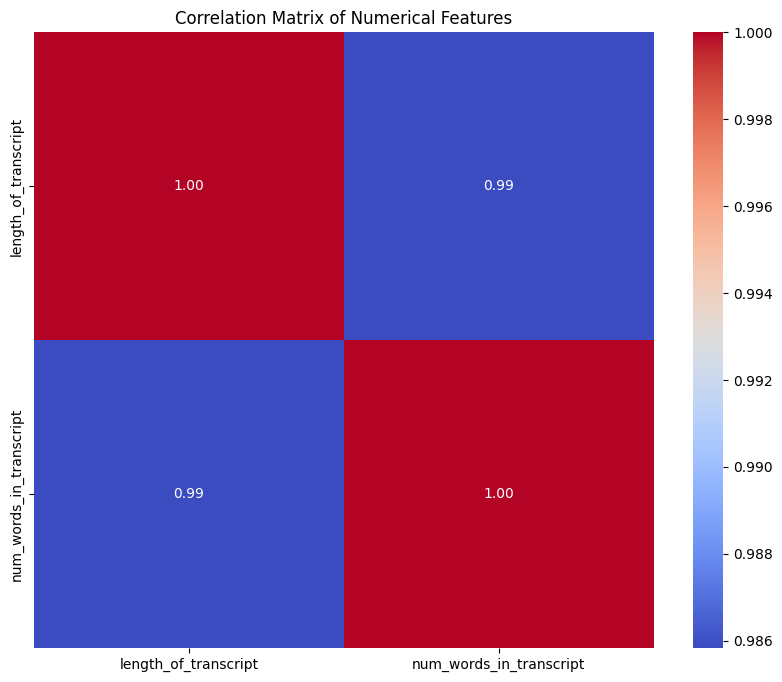

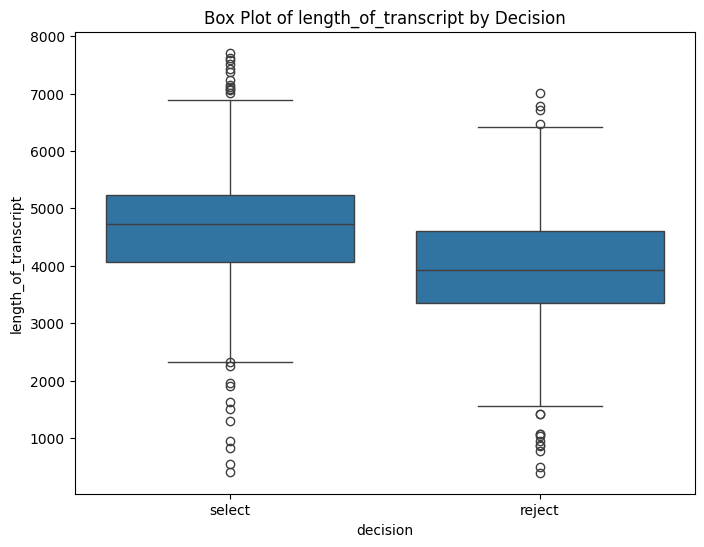

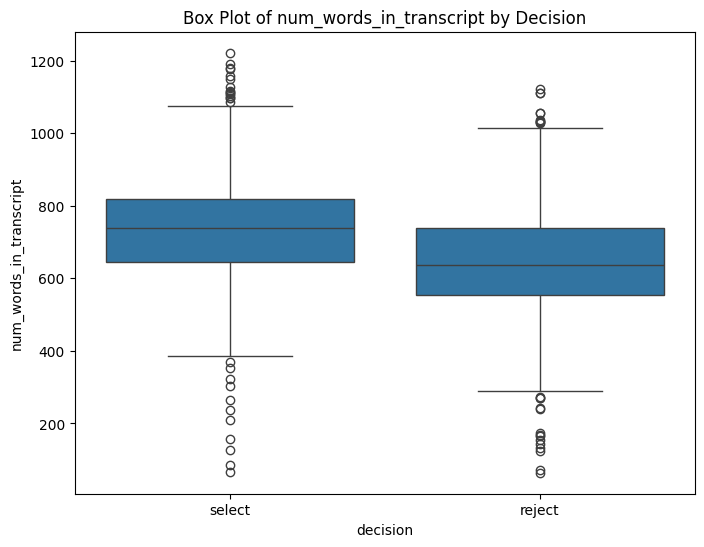

In [7]:


# Calculate the correlation matrix, only including numerical features
correlation_matrix = combined_df.select_dtypes(include=np.number).corr()
# Select only numerical columns before calculating correlations

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Box plots for numerical features grouped by decision
numerical_cols = combined_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='decision', y=col, data=combined_df)
    plt.title(f'Box Plot of {col} by Decision')
    plt.show()



# Key Insights and Conclusions

# 1. Transcript Length and Decision:
# Analyze the mean length of transcripts for 'select' and 'reject' decisions.  A significant difference suggests transcript length is a predictor.

# 2. Number of Words and Decision:
# Examine the distribution of the number of words in transcripts for both 'select' and 'reject' decisions.  Differences in these distributions can indicate whether word count influences decisions.  Look at mean, median, and standard deviation by role and decision for further insights.

# 3. Role-Based Analysis:
# Investigate how the role of the candidate interacts with the decision.  Consider the mean, median, and standard deviation of word count by role and decision.

# 4. Correlation Analysis:
# The correlation matrix reveals relationships between numerical features.  Strong positive or negative correlations could indicate multicollinearity or important predictive relationships.

# 5. Box Plots by Decision:
# Box plots visualize the distribution of numerical features for each decision.  Differences in median, quartiles, and presence of outliers can indicate which numerical features are most discriminative between 'select' and 'reject'.

# 6. Categorical Feature Analysis:
# Count plots show the frequency of each category in categorical features, broken down by decision.  This identifies if specific categories are associated with a higher likelihood of selection or rejection.

# Example Conclusion Formulation (based on hypothetical findings):

# "Analysis reveals a strong correlation between transcript length and the decision outcome. Candidates selected tend to have significantly longer transcripts compared to those rejected.  Furthermore, the number of words in the transcript, particularly for candidates in the 'Engineer' role, demonstrates a clear difference between selected and rejected applicants.  The correlation matrix highlights potential interactions between numerical features, and the box plots further emphasize disparities in the distribution of these features across different decision categories."

# Add more specific insights based on your actual data analysis results.

#Example code to print specific observations. Replace with your actual findings.